In [4]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from sklearn.model_selection import StratifiedKFold,KFold
import cv2

In [5]:
data_file = '../pkl/ckp_with_img_geometry_106.pkl'
data_file = '../pkl/oulu_casia_with_img_geometry.pkl'
data_file = '../pkl/ckplus_with_img_geometry_3frame.pkl'
data_file = '../pkl/ck+_6_classes_img_and_55_landmark.pickle'
data_file = '../pkl/ck+_6_classes_img_and_55_landmark_106.pickle'
data_file = '../pkl/ck+_6_classes_img_and_55_landmark_106_shuffle.pickle'
data_file = '../data/ck+_6_classes_img_and_55_landmark_106_stratified.pickle'
data_file = '../data/ck+_6_classes_img_and_55_landmark_106_pair.pickle'
data_file = '../data/ck+_6_classes_img_and_55_landmark_106_224.pickle'
data_file = '../data/ck+_img_and_55_landmark_3_frame.pickle'
data_file = '../data/ck+_img_and_55_landmark_3_frame_A+G_separate_224.pickle'
# data_file = '../data/ck+_img_and_55_landmark_3_frame_224_appearance.pickle'
# data_file = '../data/oulu_6_classes_img_and_55_landmark_3frames_A+G.pickle'
# data_file = '../pkl/oulu_6_classes_img_and_55_landmark.pickle'
# data_file = '../pkl/ck+_6_classes_img_and_55_landmark_4_crop.pickle'
# data_file = '../pkl/ck+_6_classes_img_hog_and_55_landmark_4_crop.pickle'
if not os.path.exists(data_file):
    print('file {0} not exists'.format(data_file))
    exit()
with open(data_file, 'rb') as f:
    data = pickle.load(f)

In [37]:
# print(data[0])
print(len(data))
# print(data[0][0])
inputs, labels = [], []
for i, id_group in enumerate(data):
    inputs.append([])
    labels.append([])
    for j, group in enumerate(id_group):
        inputs[i].append((group[0], group[1]))
        if j == 0:
            labels[i].append(group[2])

    
# inputs = data[:][:][:2]
# labels = data[:][:][2]
print(labels[0])
print(len(inputs[0][0]))
inputs, labels = np.array(inputs), np.array(labels)
sfolder = StratifiedKFold(n_splits=10, shuffle=True)
for train, test in sfolder.split(inputs, labels):
    # print(train, test)
    train_group = inputs[train]
    train_label = labels[train]
    test_group = inputs[test]
    test_label = labels[test]
    print(len(train_group), len(test_group))
    img_trainset, lm_trainset, label_trianset = [], [], []
    img_testset, lm_testset, label_testset = [], [], []
    for index, group in enumerate(train_group):
        for instance in group:
            img_trainset.append(instance[0])
            lm_trainset.append(instance[1])
            label_trianset.append(train_label[index])

    img_trainset = np.stack(img_trainset, axis=0)
    lm_trainset = np.stack(lm_trainset, axis=0)
    label_trianset = np.array(label_trianset).squeeze()
    for index, group in enumerate(test_group):
        for instance in group:
            img_testset.append(instance[0])
            lm_testset.append(instance[1])
            label_testset.append(test_label[index])
    img_testset = np.stack(img_testset, axis=0)
    lm_testset = np.stack(lm_testset, axis=0)
    label_testset = np.array(label_testset).squeeze()

    print(img_trainset.shape, lm_trainset.shape, label_trianset.shape)
    print(img_testset.shape, lm_testset.shape, label_testset.shape)
    print(label_testset)



309
[2]
2
278 31
(831, 128, 128) (831, 2, 55) (831,)
(91, 128, 128) (91, 2, 55) (91,)
[1 1 1 3 3 3 4 4 4 2 2 2 1 1 1 2 2 2 0 0 0 0 0 0 2 2 2 1 1 1 3 3 3 4 4 4 1
 1 1 4 4 4 0 0 0 1 1 1 4 4 4 5 5 5 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 2 2 2 2 4
 4 4 0 0 0 2 2 2 4 4 4 5 5 5 4 4 4]
278 31
(830, 128, 128) (830, 2, 55) (830,)
(92, 128, 128) (92, 2, 55) (92,)
[4 4 4 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 2 2 2 1 1 1 4 4 4 1 1 1 0 0 0 4 4
 4 5 5 5 0 0 0 4 4 4 2 2 2 2 2 2 1 1 1 1 1 1 3 3 3 3 3 3 4 4 4 1 1 1 2 2 2
 3 3 3 5 5 5 4 4 4 2 2 2 4 4 4 2 2 2]
278 31
(829, 128, 128) (829, 2, 55) (829,)
(93, 128, 128) (93, 2, 55) (93,)
[2 2 2 0 0 0 5 5 5 1 1 1 4 4 4 1 1 1 1 1 1 4 4 4 5 5 5 4 4 4 2 2 2 4 4 4 0
 0 0 1 1 1 3 3 3 2 2 2 1 1 1 3 3 3 4 4 4 3 3 3 1 1 1 2 2 2 2 2 2 4 4 4 0 0
 0 1 1 1 1 1 1 0 0 0 2 2 2 4 4 4 5 5 5]
278 31
(829, 128, 128) (829, 2, 55) (829,)
(93, 128, 128) (93, 2, 55) (93,)
[5 5 5 0 0 0 2 2 2 1 1 1 5 5 5 2 2 2 3 3 3 0 0 0 2 2 2 4 4 4 1 1 1 2 2 2 2
 2 2 4 4 4 4 4 4 1 1 1 2 2 2 4 4 4 0 0 0 1 1 1 

In [6]:
print(data[0].keys())
print(np.array(data[0]['img']).shape)
# print(np.array(data[0]['landmark']).shape)
print(np.array(data[0]['landmark_geo']).shape)
print(np.array(data[0]['landmark_hog']).shape)
print(len(data[0]['labels']))
for i in range(10):
    print(len(data[i]['labels']))

dict_keys(['img', 'landmark_geo', 'landmark_hog', 'labels'])
(31, 224, 224, 3)
(31, 2, 3, 55)
(31, 36, 3, 55)
31
31
31
31
31
31
31
31
31
31
30


(224, 224) (2, 3, 55) (36, 3, 55) 4


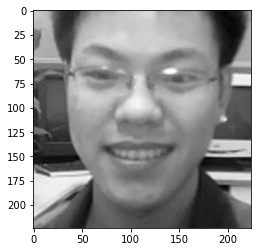

In [147]:
plt.gray()
fold_indx = 0
num = 4
emotion_map = {0: 'disgust', 1: 'surprise', 2: 'anger', 3:'fear', 4: 'happiness', 5: 'sadness'}
img = data[fold_indx]['img'][num][:, :, 0]
# landmark = data[fold_indx]['landmark'][num]
landmark_g = data[fold_indx]['landmark_geo'][num]
landmark_h = data[fold_indx]['landmark_hog'][num]
label = data[fold_indx]['labels'][num]
# print(img.shape, landmark.shape, label)
print(img.shape, landmark_g.shape, landmark_h.shape, label)

# print(landmark[0,0], landmark[1, 0])
# x, y = landmark[0,20], landmark[1, 20]
# image = Image.fromarray(img)
# draw = ImageDraw.Draw(image)
# for i in range(55):
#     draw.point(landmark[:, i])
#     draw.text(landmark[:, i], str(i))

plt.imshow(img)
# print(landmark[:,0, 7])

In [139]:
fold_indx = 9
num = 2
img = data[fold_indx]['img'][num][:, :, 2]
landmark = data[fold_indx]['landmark'][num][:, 2, :]
label = data[fold_indx]['labels'][num]
print(img.dtype)
# img = cv2.imread(img)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
# 连线
# img = Image.fromarray(img)
# draw = ImageDraw.Draw(img)
# 左眉毛 0 ~ 4 右眉毛 5 ~ 9 鼻梁 10 ~ 13 鼻墩 14 ~ 18 左眼 19 ~ 24 右眼 25 ~ 30 上嘴唇 31 ~ 42 (39 ~ 41 里面 3 个) 下嘴唇 42 ~ 54 (51, 52, 53 里面 3个)(42, 43 不相连)
edge = [(0, 1), (1, 2), (2, 3), (3, 4), (5, 6), (6, 7), (7, 8), (8, 9), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 19), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (30, 25), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (43, 44), (44, 45), (45, 46), (46, 47), (47, 48), (48, 49), (31, 49), (38, 43), (4, 10), (5, 10), (0, 19), (9, 28), (22, 10), (10, 25), (31, 11), (38, 11), (10, 11), (22, 11), (11, 25)]
red = (0, 0, 255)
for i in range(55):
    # draw.point(landmark[:, i])
    pos = (landmark[0, i], landmark[1, i])
    cv2.circle(img, pos, 1, color=(0, 255, 0))
    font = cv2.FONT_HERSHEY_SIMPLEX
    if i in (38, 43):
        cv2.putText(img, str(i), pos, font, 0.3, (0, 0, 255), 1, cv2.LINE_AA)
for i, j in edge:
    cv2.line(img, tuple(landmark[:, i]), tuple(landmark[:, j]), red, 1)

cv2.namedWindow("img", 2)
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
# plt.imshow(img)

uint8


TypeError: integer argument expected, got float

In [14]:
for fold in data:
    print(len(fold['labels']))

93
93
93
93
93
93
93
93
93
85


In [15]:
for fold in data:
    for i in range(len(fold)):
        assert fold['landmark'][i].shape == (2, 55)

In [16]:
# print(data[0]['crop'][0].shape)

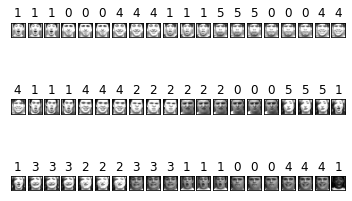

In [43]:
plt.gray()
index = 1
fold_index = 1
fold_len = len(data[fold_index]['labels'])
# plt.subplot(3, 20, 1)
for i in range(60):
    ax = plt.subplot(3, 20, i + 1)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_title(data[fold_index]['labels'][i])
    img = np.array(data[fold_index]['img'][i][:,:,1])
    plt.imshow(img)
# img = np.array(data[fold_index]['img'][index])
# print(img.shape)
# plt.imshow(img)
# plt.subplot(1, 5, 2)
# plt.imshow(data[fold_index]['leye'][index], cmap='gray')
# plt.subplot(1, 5, 3)
# plt.imshow(data[fold_index]['reye'][index], cmap='gray')
# plt.subplot(1, 5, 4)
# plt.imshow(data[fold_index]['nose'][index], cmap='gray')
# plt.subplot(1, 5, 5)
# plt.imshow(data[fold_index]['lip'][index], cmap='gray')

In [18]:
file_oulu = '..\pkl\oulu_casia_with_img_geometry.pkl'
with open(file_oulu, 'rb') as f:
    data_oulu = pickle.load(f)

In [1]:
import torch_geometric

ModuleNotFoundError: No module named 'torch_sparse'